<a href="https://colab.research.google.com/github/Cesareloy01/Ejercicios-simulaci-n-/blob/main/Comparaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
from numba import jit
import scipy.stats as ss

In [2]:
@jit(nopython = True)
def MC_AyE(n = 10**3, a=0, b=1, p = 1):
  cuenta = 0
  c = max((np.exp(a)-1)/(np.e - 1), (np.exp(b)-1)/(np.e - 1))
  l = list()
  for i in range(1, n+1):
    r_1, r_2 = random(), random()
    x = a + r_1 * (b-a)
    g = (np.exp(x)-1)/(np.e - 1) #Función a integrar
    if  g > c*r_2:
      cuenta +=1
    if i%p == 0:
      l.append(c * (b-a) * cuenta/i)
  return l

In [3]:
@jit(nopython = True)
def MC_C(n = 10*3, a=0, b=1, p = 1):
  l = []
  lg = []
  for i in range(n):
    r = random()
    x = a + r*(b-a)
    g = (np.exp(x)-1)/(np.e - 1) #Fnción a integrar
    l.append(g)

    if i%p == 0:
      lg.append(np.array(l).mean())
  return lg

In [4]:
@jit(nopython = True)
def MC_MI(n = 10*3, a=0, b=1, p = 1):
  l, k = [], []
  c = 2
  for i in range(n):
    r = np.sqrt(a + (b-a)*random())
    f = c*r
    g = (np.exp(r)-1)/(np.e-1)
    l.append(g/f)

    if i%p == 0:
      k.append(np.array(l).mean())
  return k

In [5]:
@jit(nopython = True)
def MC_ME(n = 10*3, m = 10, a=0, b=1, paso = 1):
  p = (b-a)/m
  li, lk = [], []

  for k in range(n):
    l1, l2 = a, a + p
    for i in range(m):
      r = l1 + p*random()
      g = (np.exp(r)-1)/(np.e - 1)
      li.append(g)
      l1 = l2
      l2 = l1 + p


      lk.append(np.array(li).mean())
  return lk

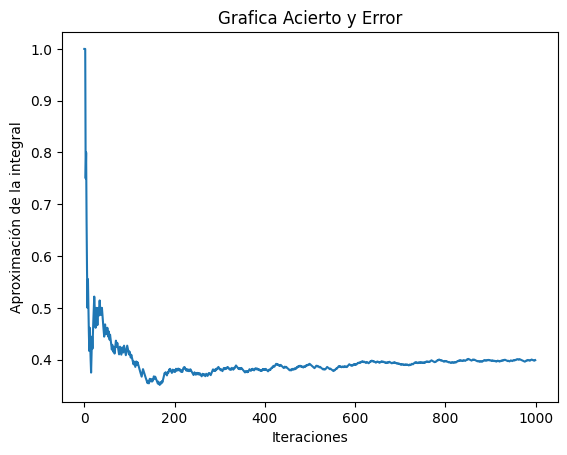

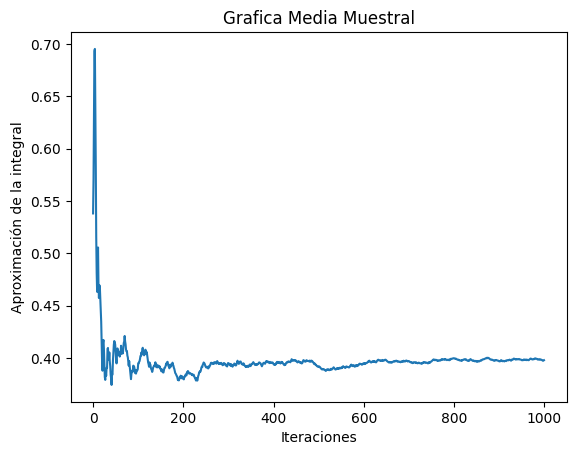

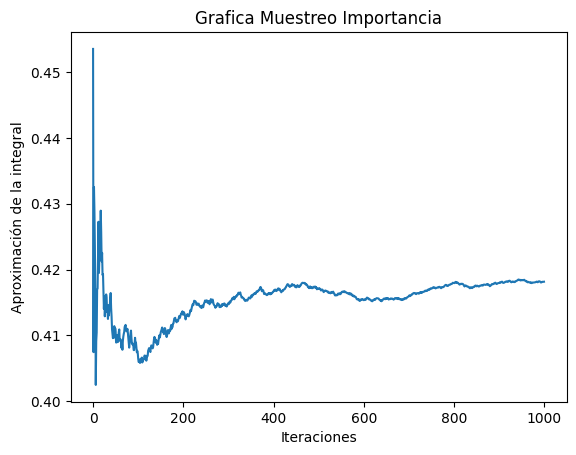

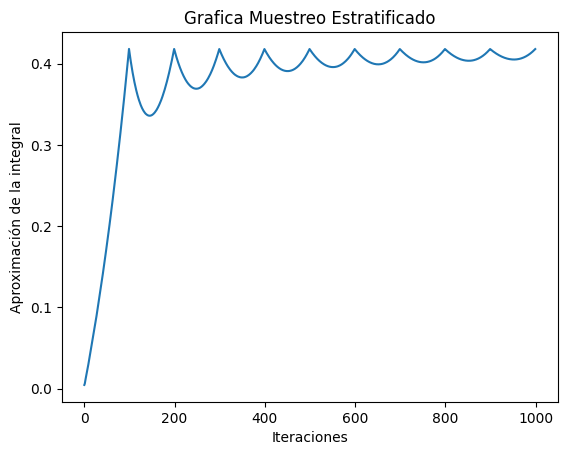

Aproximación por Acierto y Error: 0.399
Aproximación por Media Muestral: 0.3978890709080238
Aproximación por Muestreo Importancia: 0.4181456415872002
Aproximación por Muestreo Estratificado: 0.418061854480655


In [7]:
n = 1000
m = 100 #Cantidad de subintervalos
a, b = 0, 1
ae = MC_AyE(n, a, b)
c = MC_C(n,a,b)
i = MC_MI(n,a,b)
e = MC_ME(n//m,m,a,b)

plt.plot(ae)
plt.title("Grafica Acierto y Error")
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación de la integral')

plt.figure()
plt.plot(c)
plt.title("Grafica Media Muestral")
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación de la integral')

plt.figure()
plt.plot(i)
plt.title("Grafica Muestreo Importancia")
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación de la integral')

plt.figure()
plt.plot(e)
plt.title("Grafica Muestreo Estratificado")
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación de la integral')

plt.show()

print(f"Aproximación por Acierto y Error: {ae[-1]}")
print(f"Aproximación por Media Muestral: {c[-1]}")
print(f"Aproximación por Muestreo Importancia: {i[-1]}")
print(f"Aproximación por Muestreo Estratificado: {e[-1]}")

In [8]:
l_ae, l_c, l_i, l_e = [], [], [], []
N = 1000
n = 500
m = 10 #Cantidad de subintervalos
a, b = 0, 1
for i in range(N):
  l_ae.append(MC_AyE(n, a, b)[-1])
  l_c.append(MC_C(n,a,b)[-1])
  l_i.append(MC_MI(n,a,b)[-1])
  l_e.append(MC_ME(n//m,m,a,b)[-1])

In [9]:
a, b, c, d = np.array(l_ae), np.array(l_c), np.array(l_i), np.array(l_e)
v1, v2, v3, v4 = a.var(ddof=1), b.var(ddof=1), c.var(ddof=1), d.var(ddof=1)




print(f'    MC Acierto y Error:\tMedia = {a.mean()} \tVarianza = {v1}')
print(f'              MC Crudo:\tMedia = {b.mean()} \tVarianza = {v2}')
print(f'  Muestreo Importancia:\tMedia = {c.mean()} \tVarianza = {v3}')
print(f'Muestreo Estratificado:\tMedia = {d.mean()} \tVarianza = {v4}')
print(f'\n            \tValor Real:\t{1 - 1/(np.e-1)}')

    MC Acierto y Error:	Media = 0.41805600000000004 	Varianza = 0.000494122986986987
              MC Crudo:	Media = 0.41790402304305363 	Varianza = 0.0001732620540184375
  Muestreo Importancia:	Media = 0.41795788738063594 	Varianza = 5.7063962372092365e-06
Muestreo Estratificado:	Media = 0.4180155091422405 	Varianza = 1.6934103276546405e-06

            	Valor Real:	0.41802329313067355


In [11]:
#Vamos a partir de la varianza del MC Crudo
fa = v1 / v2
fb = v3 / v2
fc = v4 / v2

print(ss.f.cdf(fa, len(a)-1, len(b)-1))
print(ss.f.cdf(fb, len(c)-1, len(b)-1))
print(ss.f.cdf(fc, len(d)-1, len(b)-1))

alpha = 0.05
print(fa, ss.f.ppf(alpha, len(a)-1, len(b)-1))
print(fb, ss.f.ppf(alpha, len(c)-1, len(b)-1))
print(fc, ss.f.ppf(alpha, len(d)-1, len(b)-1))

fe = v3/v4

print(ss.f.cdf(fe, len(c)-1, len(d)-1))
print(fe, ss.f.ppf(alpha, len(c)-1, len(d)-1))

0.9999999999999999
0.0
0.0
2.8518823107938305 0.9011069882783849
0.032935060533231336 0.9011069882783849
0.009773694172380283 0.9011069882783849
0.9999999999999999
3.3697658175455616 0.9011069882783849
